# Amazon Job Analysis

In [73]:
# pandas for handling our dataset
import pandas as pd

# numpy for numeric operations
import numpy as np

import matplotlib.pyplot as plt

import collections

%matplotlib inline

In [74]:
# read the data set
amazon_dataset = pd.read_csv('amazon_jobs_dataset.csv')
# print the top 5 row from the dataframe
amazon_dataset.head(10)

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
2,2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
5,5,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
6,6,Quality Assurance Engineer,"US, WA, Seattle","March 1, 2018",Fire TV client software and service technologi...,· 3+ years of software quality assurance engin...,"· BS degree, preferably in Computer Science, e..."
7,7,Software Development Engineer,"US, CA, Cupertino","March 1, 2018",The Amazon Devices team designs and engineers ...,"· Bachelor’s degree in Computer Science, Compu...","· Master’s degree in Computer Science, Compute..."
8,8,Software Development Engineer,"US, CA, Cupertino","March 1, 2018",The Amazon Devices team designs and engineers ...,"· Bachelor’s degree in Computer Science, Compu...","· Master’s degree in Computer Science, Compute..."
9,9,Software Development Manager - Amazon Cloud Cam,"US, CA, Cupertino","March 1, 2018",The Amazon Devices team designs and engineers ...,· Bachelor’s Degree in Computer Science or rel...,· Master’s degree in Computer Science or relat...


In [75]:
amazon_dataset.tail(5)

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
3488,3488,Software Engineer,"US, NV, Las Vegas","August 29, 2012",What are you currently doing? We’re building a...,· 5+ years production Java software developmen...,· 7+ years Java software development in a prod...
3489,3489,Software Development Engineer,"US, WA, Seattle","April 23, 2012",At Amazon Voice and Advanced Natural Shopping ...,* Bachelor’s Degree in Computer Science or rel...,* Experience building complex software systems...
3490,3490,Software Development Engineer III - Mar. BR 2012,"US, WA, Seattle","March 6, 2012",Employer: Amazon Corporate LLCPosition: Softwa...,Basic Qualifications:Education: Master’s degre...,-
3491,3491,Software Development Engineer in Test II - IMM546,"US, WA, Seattle","November 28, 2011",POSITIONS AVAILABLECompany: Amazon Corporate L...,-,-
3492,3492,Software Development Engineer in Test,"US, WA, Seattle","July 7, 2011",Kindle and Amazon are impacting the world with...,"· Bachelor’s degree in Computer Science, Compu...",· Experience with open source tools and resour...


In [76]:
amazon_dataset.shape

(3493, 7)

In [77]:
amazon_dataset.columns

Index(['Unnamed: 0', 'Title', 'location', 'Posting_date', 'DESCRIPTION',
       'BASIC QUALIFICATIONS', 'PREFERRED QUALIFICATIONS'],
      dtype='object')

In [78]:
amazon_dataset.dtypes

Unnamed: 0                   int64
Title                       object
location                    object
Posting_date                object
DESCRIPTION                 object
BASIC QUALIFICATIONS        object
PREFERRED QUALIFICATIONS    object
dtype: object

In [79]:
amazon_dataset.count()

Unnamed: 0                  3493
Title                       3493
location                    3493
Posting_date                3493
DESCRIPTION                 3484
BASIC QUALIFICATIONS        3484
PREFERRED QUALIFICATIONS    3484
dtype: int64

In [80]:
#number of unique Title and displayed the Titles
len(amazon_dataset.Title.unique()), amazon_dataset.Title.unique()

(1558, array(['Software Development Manager', 'Software Development Engineer',
        'Software Development Engineer - Amazon Lex', ...,
        'Amazon Kindle Software Engineer',
        'Software Development Engineer III - Mar. BR 2012',
        'Software Development Engineer in Test II - IMM546'], dtype=object))

In [81]:
#number of unique location and displayed the locations
len(amazon_dataset.location.unique()), amazon_dataset.location.unique()

(90, array(['US, WA, Seattle ', 'IN, KA, Bangalore ', 'US, CA, Cupertino ',
        'RO, Iaşi ', 'US, CA, East Palo Alto ', 'US, CA, Santa Monica ',
        'US, CA, Sunnyvale ', 'US, CA, Palo Alto ', 'US, MA, Boston ',
        'US, MA, Cambridge ', 'CA, BC, Vancouver ', 'US, TX, Austin ',
        'IN, TS, Hyderabad ', 'US, CA, San Francisco ', 'DE, BY, Munich ',
        'RO, Iasi ', 'PL, Gdansk ', 'PL, Bielany Wroclawskie ',
        'DE, Berlin ', 'US, CA, Irvine ', 'CA, ON, Toronto ',
        'US, MA, North Reading ', 'US, MN, Minneapolis ', 'AE, Dubai ',
        'US, CA, San Diego ', 'US, CA, Santa Barbara ', 'US, OR, Portland ',
        'ES, Madrid ', 'IT, Vercelli ', 'US, NJ, Newark ',
        'US, NY, New York ', 'IN, TN, Chennai ', 'IL, Herzliya ',
        'DE, Aachen ', 'US, MA, Westborough ', 'US, VA, Herndon ',
        'US, WA, Bellevue ', 'UK, London ', 'ZA, Cape Town ',
        'US, MA, Andover ', 'US, CO, Boulder ', 'US, CA, Santa Cruz ',
        'US, CA, San Luis Obispo '

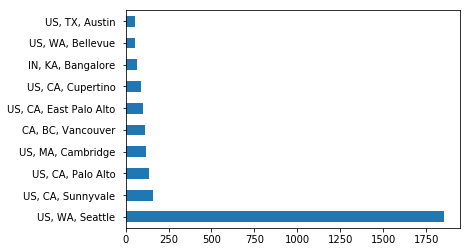

In [82]:
location_count=amazon_dataset.location.value_counts().head(10)
#loc_count=location_count[location_count>20]
location_count.plot(kind='barh')

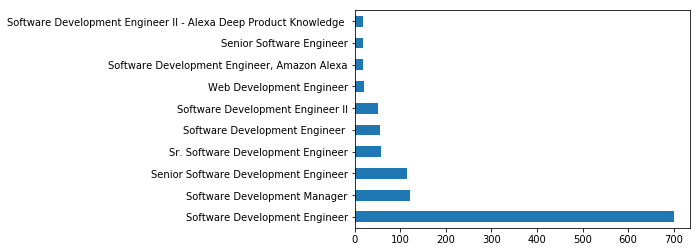

In [83]:
#frequency of Title
title_count=amazon_dataset.Title.value_counts().head(10)
title_count.plot(kind='barh')

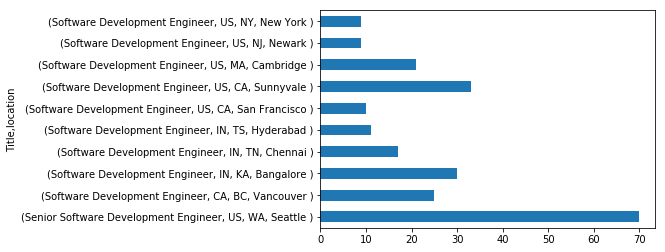

In [84]:
#frequency for title and location together
title_loc = amazon_dataset.groupby(['Title', 'location']).size()
title_location=title_loc[title_loc>8].head(10)
#plt.figure(figsize=(15,15))
title_location.plot(kind='barh')

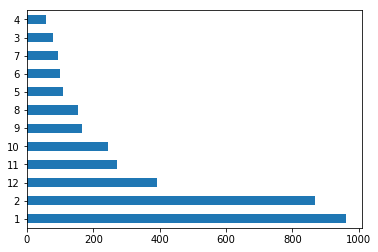

In [85]:
# by posting date
amazon_dataset['year'] = pd.DatetimeIndex(amazon_dataset['Posting_date']).year
amazon_dataset['month'] = pd.DatetimeIndex(amazon_dataset['Posting_date']).month
posting_month = amazon_dataset['month'].value_counts()
posting_month.plot(kind='barh')

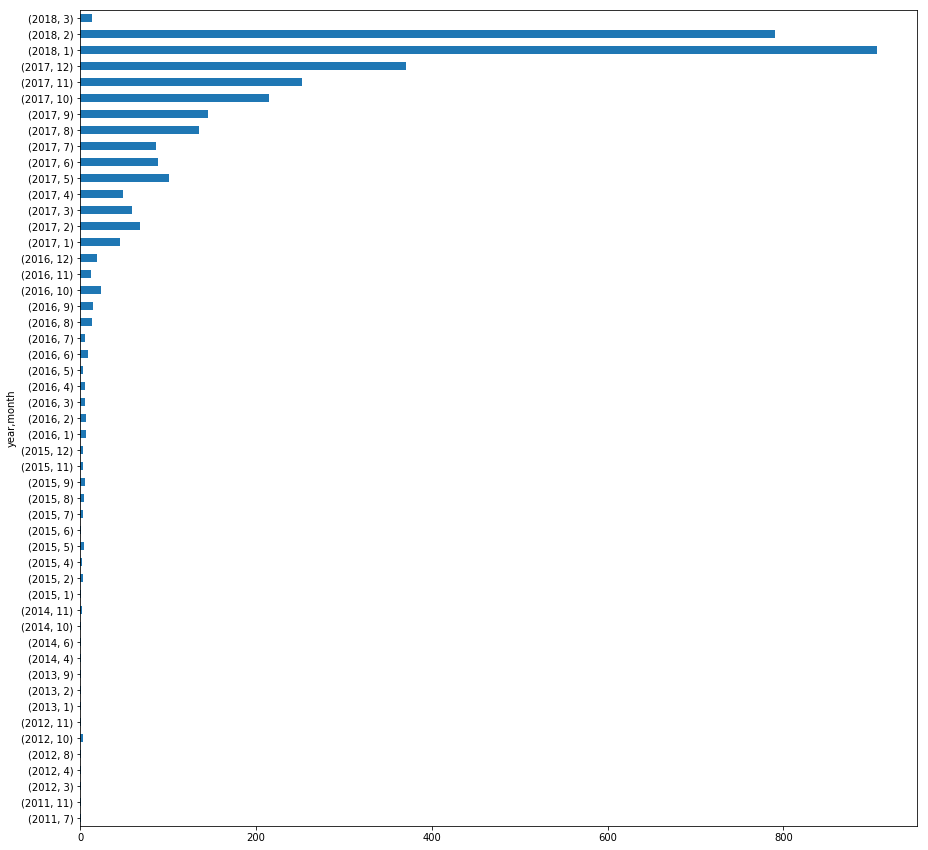

In [86]:
#frequency of Year and month together

amazon_dataset['year'] = pd.DatetimeIndex(amazon_dataset['Posting_date']).year
amazon_dataset['month'] = pd.DatetimeIndex(amazon_dataset['Posting_date']).month
month_year_count = amazon_dataset.groupby(['year','month']).size()
month_year_count.sort_values
plt.figure(figsize=(15,15))
month_year_count.plot(kind='barh')

 ### for now considering data only from US for temporary

In [87]:
us_data = amazon_dataset[amazon_dataset.location.str.startswith('US')]
len(us_data)

2867

In [88]:
us_data.head()

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS,year,month
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...,2018,3
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...,2018,3
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...,2018,3
5,5,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...,2018,3
6,6,Quality Assurance Engineer,"US, WA, Seattle","March 1, 2018",Fire TV client software and service technologi...,· 3+ years of software quality assurance engin...,"· BS degree, preferably in Computer Science, e...",2018,3


### we were discussing about to consider only basic skills, created new dataframe 

In [89]:
# new dataframe called title_location_bQualification
title_location_bQualification = us_data[['Title', 'location', 'BASIC QUALIFICATIONS']]
title_location_bQualification.head(5)

,Title,location,BASIC QUALIFICATIONS
0,Software Development Manager,"US, WA, Seattle",· Proven track record of hiring and managing h...
3,Software Development Engineer - Amazon Lex,"US, WA, Seattle",· Bachelors Degree in Computer Science or a re...
4,Software Development Engineer - Amazon Lex,"US, WA, Seattle",· Bachelors Degree in Computer Science or a re...
5,Software Development Engineer - Amazon Lex,"US, WA, Seattle",· Bachelors Degree in Computer Science or a re...
6,Quality Assurance Engineer,"US, WA, Seattle",· 3+ years of software quality assurance engin...


In [90]:
title_location_bQualification.sort_values(['location']).head(10)

,Title,location,BASIC QUALIFICATIONS
618,Software Development Engineer,"US, AZ, Tempe","· BS in Computer Science, Computer or Electric..."
617,Sr Software Development Engineer,"US, AZ, Tempe","· BS in Computer Science, Computer or Electric..."
1177,"Software Development Engineer, Amazon Alexa","US, AZ, Tempe",· Bachelor's degree in Computer Science or rel...
559,Software Development Engineer,"US, AZ, Tempe","· BS in Computer Science, Computer or Electric..."
881,Software Development Engineer - Alexa Communic...,"US, AZ, Tempe",· Bachelor's degree and/or Master's degree in ...
1637,Software Development Engineer,"US, AZ, Tempe",· BS in Computer Science or related degree (Ma...
1352,Software Development Manager,"US, CA, Cupertino",· Bachelor’s degree in computer science or rel...
2667,Software Quality Assurance Engineer,"US, CA, Cupertino",· Bachelor’s Degree in Computer Science or rel...
1841,Software Development Engineer - IoT/Cloud,"US, CA, Cupertino",· Bachelor's or Masters in Computer Science or...
272,Software Development Engineer II - AMZ2530,"US, CA, Cupertino",Position Requirements:Bachelor's degree or for...


In [143]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import re

In [144]:
text = []
for i in range(len(title_location_bQualification)):
    str_temp = title_location_bQualification.iloc[i,:]['BASIC QUALIFICATIONS']
    mystr = str(str_temp)
    str_token = word_tokenize(mystr)
    clwrds = [w for w in str_token if not w in stopwords.words('english')]
    is_noun = lambda pos: pos[:2] == 'NN'
    nouns = [word for (word, pos) in pos_tag(clwrds) if is_noun(pos)]
    text.extend(nouns)
    

In [145]:
text = sorted(set(text))
text

['%',
 '*',
 '+',
 '++',
 '..',
 '.Familiarity',
 '.NET',
 '.NET/V8/Chakra.·',
 '.Net',
 '.Net·',
 '.drivers',
 '.net',
 '.·',
 '/',
 '/.NETand',
 '/.net',
 '//aws.amazon.com/security',
 '/C++',
 '/C++·',
 '/JavaScript',
 '/Scala/Python·',
 '7+years',
 '@',
 'A',
 'AAA',
 'AB',
 'ACLs',
 'ADB·',
 'AES',
 'AGL',
 'AI',
 'AJAX',
 'AJAX·',
 'ALSA',
 'API',
 "API's·",
 'APIs',
 'APIs.·',
 'APIs·',
 'API·',
 'ARM',
 'ARP',
 'AS-4',
 'ASIC',
 'ASIC/FPGA',
 'ASICs/drivers·',
 'ASP.NET',
 'ASP.Net',
 'AT',
 'AVFoundation',
 'AWS',
 'AWS.·',
 'AWS·',
 'Abilities·',
 'Ability',
 'Able',
 'Academic',
 'Access',
 'Achieved',
 'Acoustics',
 'Action',
 'Active',
 'Active/Full',
 'Actively',
 'Ad',
 'Adept',
 'Adobe',
 'Advanced',
 'Advertising',
 'Agile',
 'Agile/Lean',
 'Agile/SCRUM',
 'Agile/Scrum',
 'Agile/iterative',
 'Alexa',
 'Algorithm',
 'Algorithms',
 'Algorithms.·',
 'Algorithms·',
 'Alternatively',
 'Amazon',
 'Analysis',
 'Analysis·',
 'Analyst',
 'Analytical',
 'Analytics',
 'Android',


In [146]:
text_preffered = []
for i in range(len(amazon_dataset)):
    str_temp1 = amazon_dataset.iloc[i,:]['PREFERRED QUALIFICATIONS']
    mystr1 = str(str_temp1)
    str_token1 = word_tokenize(mystr1)
    clwrds1 = [wrd for wrd in str_token1 if not wrd in stopwords.words('english')]
    is_noun1 = lambda pos: pos[:2] == 'NN'
    nouns1 = [word1 for (word1, pos) in pos_tag(clwrds1) if is_noun1(pos)]
    text_preffered.extend(nouns1)

In [147]:
text_preffered = sorted(set(text_preffered))
text_preffered

['%',
 '*',
 '**',
 '*****************************************************************************************************',
 '***LI-AL1aws-sdesdm-na',
 '***LI-AS2aws-support-ea',
 '***LI-JF1aws-sdesdm-na',
 '**For',
 '**LI-LJ1',
 '**aws-sdesdm-na*LI-AC1',
 '*LI-AD2',
 '*LI-ER1',
 '*LI-JF1aws-sdesdm-na',
 '*LI-TM1*aws-sdesdm-na',
 '*LY-ALPHA',
 '*MVP221982',
 '*MVP221982*Please',
 '*MVP221982aws-sdesdm-naaws-security-sde',
 '*nix',
 '+',
 '-Experience',
 '-Minority/Female/Disability/Veteran/Gender',
 '.Experience',
 '.NET',
 '.Net',
 '.drivers',
 '.·',
 '/',
 '/.NET',
 '//aws.amazon.com',
 '//aws.amazon.com/',
 '//aws.amazon.com/directconnect**',
 '//aws.amazon.com/ec2',
 '//aws.amazon.com/ec2http',
 '//aws.amazon.com/vpchttp',
 '//www.amazon.jobs/AWS',
 '//www.amazon.jobs/alexa-machine-learningAmazon',
 '//www.comixology.com/about',
 '//www.youtube.com/watch',
 '//youtu.be/pL38VpBTIlo',
 '/or',
 '/•',
 '02142speech-jobs',
 '@',
 'A',
 'A/B',
 'A/V',
 'AAA',
 'AAC',
 'ACQUA',
 'ADFS',


SyntaxError: invalid syntax (<ipython-input-149-541b6d5b05ee>, line 1)